## Imports

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

## Task 1

### Original Code to Mimic

In [2]:
def noisy_line(x, noise):
    return -6.7 * x + 2 + noise
 
for _ in range(100):
    x_hat = np.random.uniform(-10, 10)
    noise_hat = np.random.uniform(-1, 1)
    print(x_hat, noisy_line(x_hat, noise_hat))

(-6.147131326912372, 42.89298802592829)
(-8.805131973835046, 60.99939666992003)
(9.312249885033907, -59.700725095292306)
(-6.536248052993113, 45.576832499857304)
(-8.677202402958496, 60.54921769969545)
(9.02771172187392, -58.94311223910573)
(0.9423801081302621, -4.947724440792655)
(3.082399878417279, -17.953301812150805)
(8.082460151352954, -52.650362191141745)
(-0.9111102206335158, 8.777719611500093)
(-0.025251277751836554, 1.7660023672066423)
(-3.5099686044911893, 24.598732493098385)
(6.646176707557455, -43.47547019807249)
(-3.049538852087017, 22.44219552120409)
(-8.269621164342567, 57.333733080184736)
(9.380593176857722, -61.06830092078438)
(-9.325485591157044, 65.26807558084238)
(-1.3374637923017296, 11.019258484155177)
(-1.0649844978012233, 9.766892566406291)
(9.919403551255193, -63.53255860158823)
(7.401304410262185, -47.899322715145644)
(0.3502463720537534, 0.24484449163773503)
(-9.024132013736892, 62.640230432631355)
(3.458655013049805, -22.018023621572734)
(8.783179259081692, 

### This mimics the behavior of the above code but in a tf style

In [3]:
tf.reset_default_graph()

with tf.name_scope( "graph" ) as scope:
    x_hat = tf.placeholder(tf.float32, None)
    noise_hat = tf.placeholder(tf.float32, None)

    noisy_line = -6.7 * x_hat + 2 + noise_hat
    
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for _ in range(100):
    x_draw = np.random.uniform(-10,10)
    ans = sess.run(noisy_line, feed_dict={x_hat:x_draw, noise_hat:np.random.uniform(-1,1)})
    print(x_draw, ans)
    

(-2.206087561046493, 15.930239)
(-1.8661164161064114, 13.958649)
(0.29206552583529444, 0.44079778)
(3.356643563366635, -20.358063)
(-9.151248160015154, 62.672585)
(0.4753981353322807, -0.80435896)
(-8.699705917318957, 60.186028)
(-2.597691741973243, 18.747347)
(-3.8502102145735284, 27.414742)
(-5.536360985053221, 38.331734)
(-3.0777375833595695, 22.631279)
(6.157108747787923, -39.647575)
(8.579490195686141, -56.45005)
(1.8828598578483007, -10.456767)
(-6.091391273377475, 42.690987)
(2.5061989998353607, -15.073541)
(-6.482463365512929, 46.121571)
(-7.843225714771616, 55.083977)
(3.5014477967048947, -22.364435)
(4.755217550349117, -30.22447)
(2.427300394862158, -13.914343)
(-0.09714840111412215, 3.5244484)
(-5.889411643488445, 41.547935)
(-2.6751040953698757, 20.463732)
(-5.942828246790464, 42.144814)
(-0.4228260112473379, 4.4586229)
(4.2225696256270915, -25.653427)
(-2.5613845464855833, 19.397675)
(1.9674964722674986, -11.402845)
(-1.385809530121998, 11.317012)
(-2.987893994265349, 21.5

## Task 2

### Original Code to Mimic

In [4]:
def noisy_line(x, noise):
    return -6.7 * x + 2 + noise

class Regression:
    def __init__(self):
        self.learning_rate = 0.005
        self.m = 0.1
        self.b = 0.1
 
    def learn(self, datum):
        x_hat, target = datum
        self.m += self.delta(x_hat, target) * x_hat
        self.b += self.delta(x_hat, target) * 1.0
 
    def delta(self, x_hat, target):
        net = self.m * x_hat + self.b
        return self.learning_rate * (target - net)
 
 
regresion_model = Regression()
 
for _ in range(1000):
    x_hat = np.random.uniform(-10, 10)
    noise_hat = np.random.uniform(-1, 1)
    y_hat = noisy_line(x_hat, noise_hat)
 
    regresion_model.learn((x_hat, y_hat))

print("I guess the line is: y = {}*x + {}".format(regresion_model.m, regresion_model.b))

I guess the line is: y = -6.72416765243*x + 1.93312750926


### This mimics the behavior of the above code but in a tf style

In [5]:
tf.reset_default_graph()
m = tf.Variable(0.1, name="m")
b = tf.Variable(0.1, name="b")
learning_rate = tf.Variable(0.005, name="learning_rate")

x_hat = tf.placeholder(tf.float32, None)
y_hat = tf.placeholder(tf.float32, None)

net = m * x_hat + b
delta = learning_rate * (y_hat - net)

learn_m = m.assign(m + delta * x_hat)
learn_b = b.assign(b + delta * 1.0)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


for _ in range(1000):
    x_draw = np.random.uniform(-10,10)
    noise_draw = np.random.uniform(-1,1)
    m_ans, b_ans = sess.run([learn_m, learn_b], feed_dict={x_hat:x_draw, y_hat:-6.7*x_draw + 2 + noise_draw})
    
print("I guess the line is: y = {}*x + {}".format(m_ans, b_ans))

I guess the line is: y = -6.76595067978*x + 2.00787043571


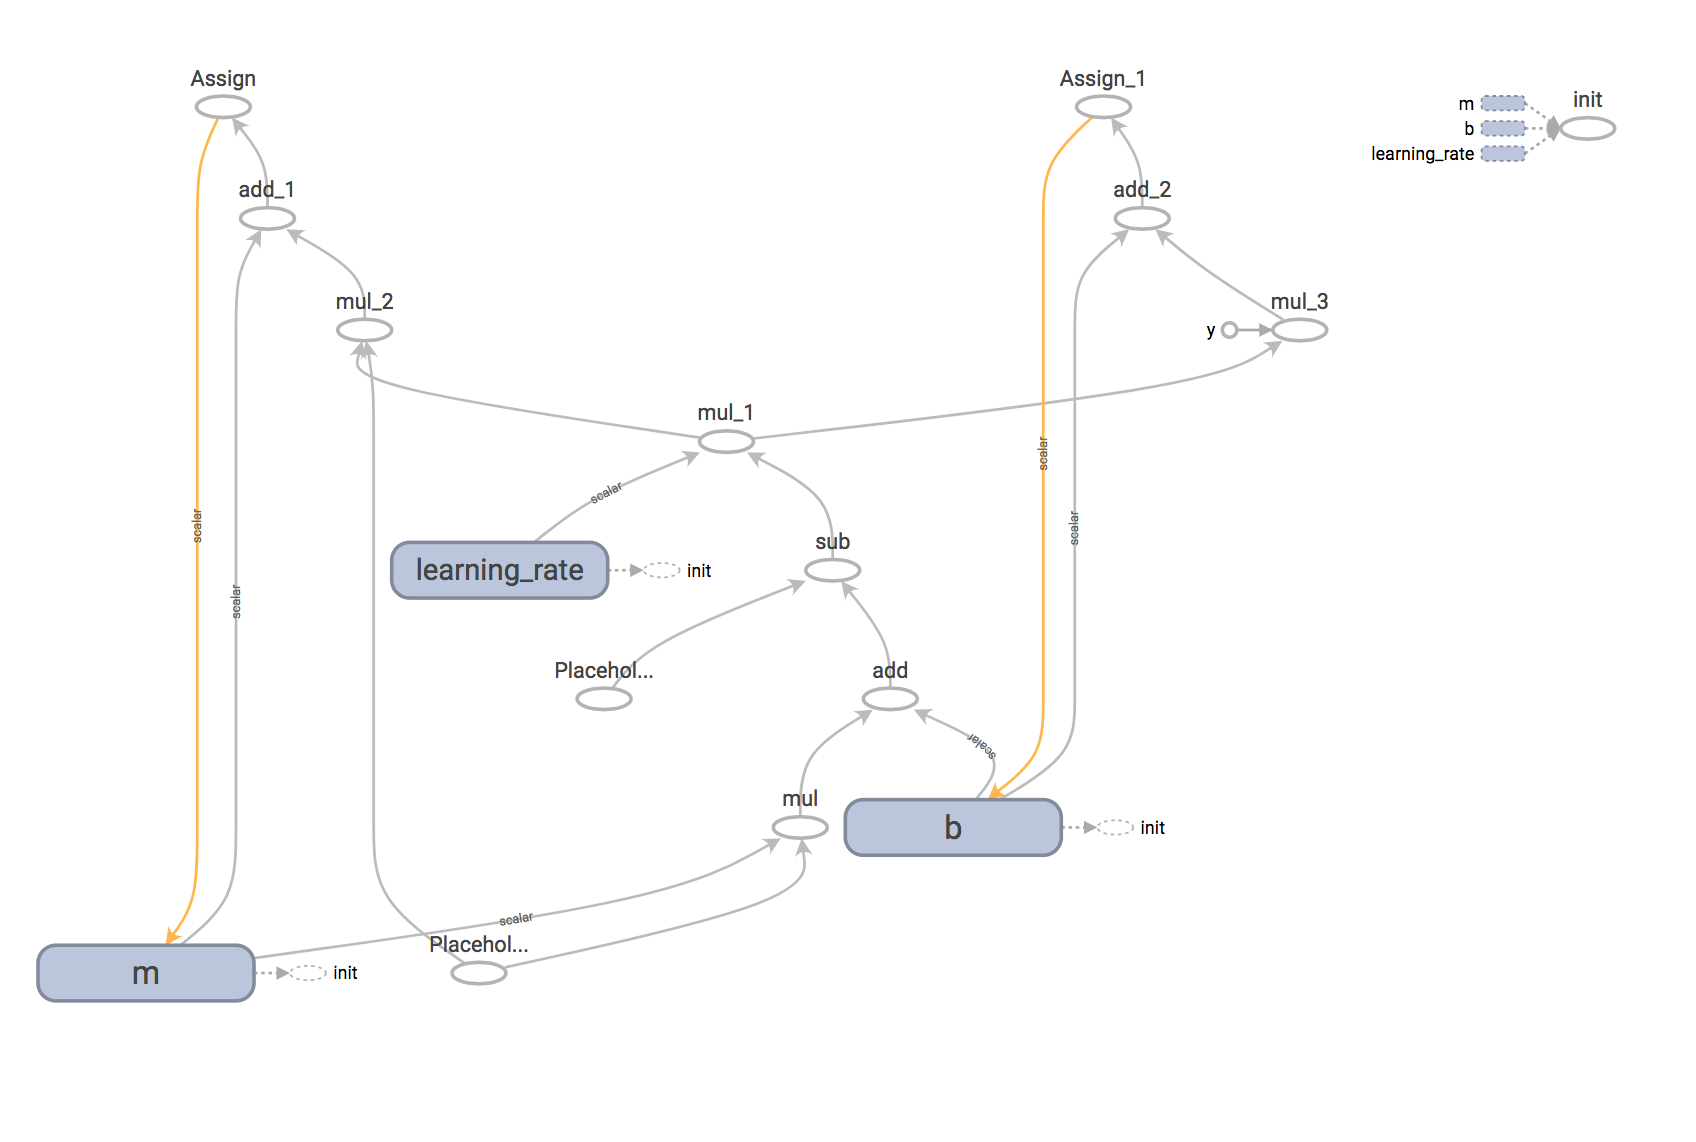

In [6]:
from IPython.display import Image
Image("task2.png")

## Task 3

### Original Code to Mimic

In [7]:
def noisy_line(x, noise):
    assert len(x.shape) == 1 and x.shape[0] == 2
    beta = [-2.3, 4.5, 9.4]
    x = np.append(x, [1])
    return np.dot(beta, x) + noise

class Regression:
    def __init__(self):
        self.learning_rate = 0.005
        self.beta = np.zeros(3)
 
    def learn(self, datum):
        x_hat, target = datum
        x_hat = np.append(x_hat, [1])
        self.beta += self.delta_w(x_hat, target)
 
    def delta_w(self, x_hat, target):
        net = np.dot(x_hat, self.beta) # self.m * x_hat + self.b
        return self.learning_rate * (target - net) * x_hat


regresion_model = Regression()
 
for _ in range(1000):
    x_hat = np.random.uniform(-10, 10, size=(2,))
    noise_hat = np.random.uniform(-1, 1)
    y_hat = noisy_line(x_hat, noise_hat)
 
    regresion_model.learn((x_hat, y_hat))
    
print("I guess beta is: {}".format(regresion_model.beta))

I guess beta is: [-2.32895222  4.56256689  9.29953676]


### This mimics the behavior of the above code but in tf style

In [8]:
beta_to_learn = [-2.3, 4.5, 9.4]

beta = tf.Variable([[0.,0.,0.]], name="b")
learning_rate = tf.Variable(0.005, name="learning_rate")

x_hat = tf.placeholder(tf.float32, [3,1])
y_hat = tf.placeholder(tf.float32, None)

net = tf.matmul(beta, x_hat)
delta = learning_rate * (y_hat - net)*x_hat
delta = tf.reshape(delta, [1,3])
beta = beta.assign(beta + delta)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)



for _ in range(1000):
    x_draw = np.random.uniform(-10, 10, size=(2,))
    x_draw = np.append(x_draw, [1])
    noise_draw = np.random.uniform(-1,1)
    beta_ans = sess.run(beta, feed_dict={x_hat:x_draw.reshape(3,1), y_hat:np.dot(beta_to_learn, x_draw) + noise_draw})
    
print("I guess beta is: {}". format(beta_ans[0]))

I guess beta is: [-2.32881856  4.42639971  9.26094055]


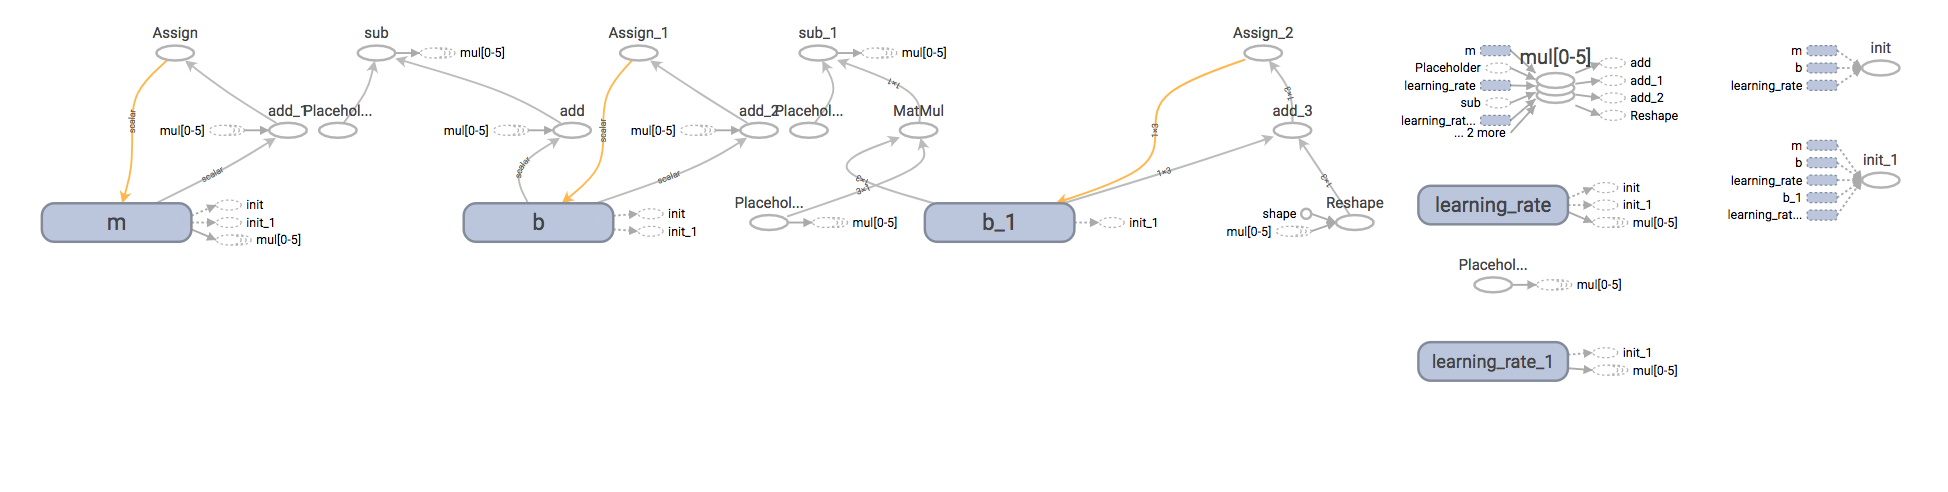

In [9]:
Image("task3.png")

## Task 4

In [10]:
def load_data(filename="foo.csv"):
    return pd.read_csv(filename).as_matrix()

In [11]:
data = load_data()

beta = tf.Variable([[0.,0.,0.]], name="b")
learning_rate = tf.Variable(0.005, name="learning_rate")

x_hat = tf.placeholder(tf.float32, [3,1])
y_hat = tf.placeholder(tf.float32, None)

net = tf.matmul(beta, x_hat)
delta = learning_rate * (y_hat - net)*x_hat
delta = tf.reshape(delta, [1,3])
beta = beta.assign(beta + delta)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    x1, x2, y = data[i]
    x_draw = np.append(x1, x2)
    x_draw = np.append(x_draw, [1])
    beta_ans = sess.run(beta, feed_dict={x_hat:x_draw.reshape(3,1), y_hat:y})
    
print("I guess beta is: {}". format(beta_ans[0]))

I guess beta is: [-7.79050541  2.69579983  0.83829123]


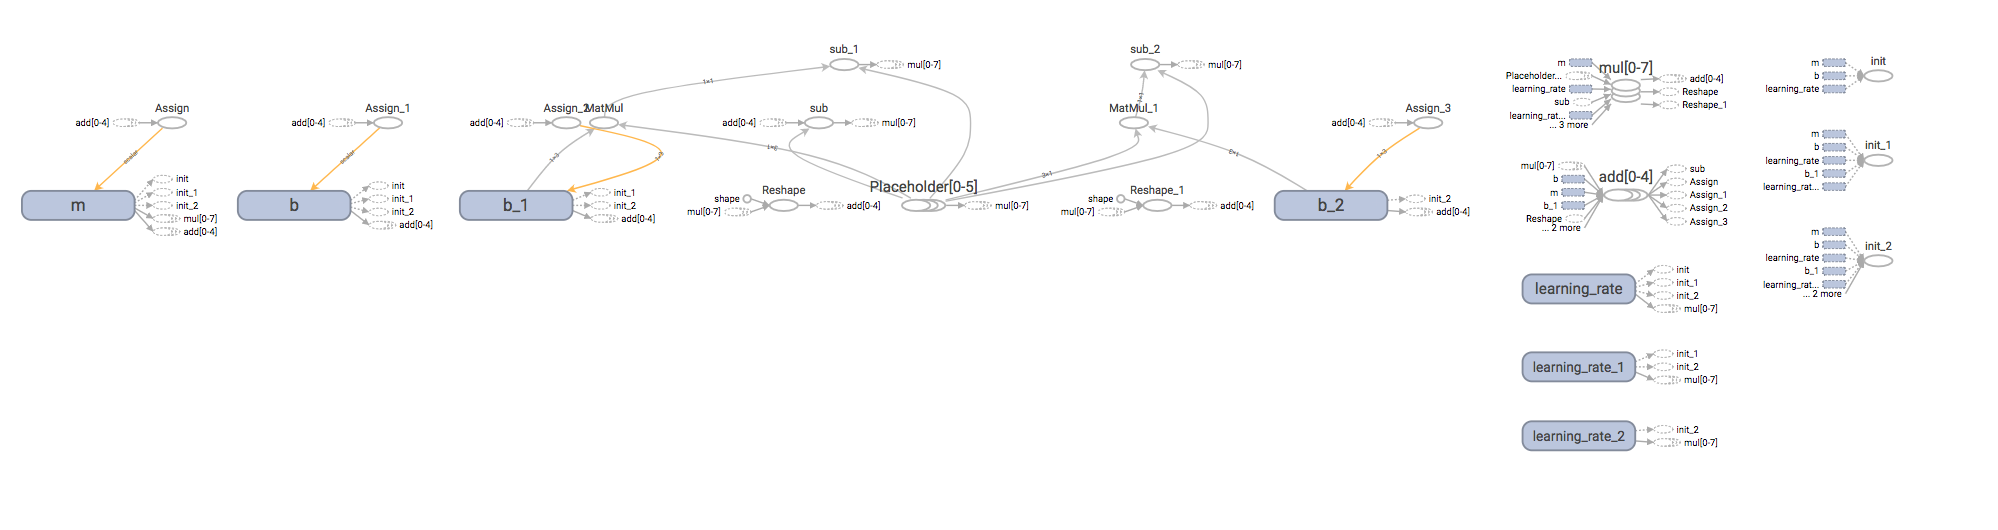

In [12]:
Image("task4.png")